In [0]:
import numpy
import matplotlib.pyplot as plt
import torch

In [0]:
from sklearn.datasets import make_blobs

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import math

In [5]:
torch.manual_seed(0)

<h3> Data Generation </h3>

In [0]:
X, Y = make_blobs(n_samples = 600, n_features = 2,centers=4, random_state=47)

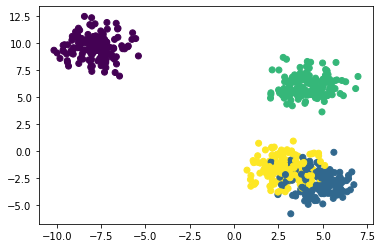

In [7]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, stratify= Y, random_state =47)

In [0]:
X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))


Note: What map is doing above is essentially (https://stackoverflow.com/questions/56327213/how-does-python-map-works-with-torch-tensor):

X_train, X_val, Y_train, Y_val = [torch.tensor(X_train), torch.tensor(X_val), torch.tensor(Y_train), torch.tensor(Y_val)]


<h3> Feedforward Network Model using PyTorch </h3>


In [0]:
#Two layer feedforward neural network
def model(x):
  a1 = torch.matmul(x,weights1) + bias1
  h1 = torch.sigmoid(a1)
  a2 = torch.matmul(h1,weights2) + bias2
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
  return h2

In [0]:
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])
y = torch.tensor([2, 0])


In [12]:
y_hat[range(y_hat.shape[0])]

tensor([[0.1000, 0.2000, 0.3000, 0.4000],
        [0.8000, 0.1000, 0.0500, 0.0500]])

In [13]:
y_hat[range(y_hat.shape[0]),y]

tensor([0.3000, 0.8000])

In [0]:
#Cross entropy loss is -log yi
def loss_fn(y_hat,y):
  return -(y_hat[range(y_hat.shape[0]),y].log()).mean()

In [0]:
def accuracy(y_hat,y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

<h3> Fitting the model </h3>

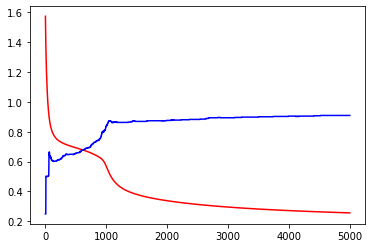

Loss before training 1.5737839937210083
Loss after training 0.2558369040489197


In [16]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2) # Xavier Initialisation
weights1.requires_grad_() 
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2) #Xavier initialisation
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 5000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

#Backpropagation
for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():#sets requires_grad=False for all parameters,
                       #so that gradients are not computed while doing weight update
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_() # set gradients to zero
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

<h3> Understanding Unsqueeze </h3>

Note: To understand any reshaping operation, look at the shape


In [17]:
x = torch.tensor([1,2,3,4])
print(x.shape)
y = torch.unsqueeze(x,-1)
z = torch.unsqueeze(y,1)

torch.Size([4])


In [18]:
print(torch.unsqueeze(x, 0))
print(torch.unsqueeze(x, 0).shape)
print(torch.unsqueeze(x, 1))
print(torch.unsqueeze(x,1).shape)

print(torch.unsqueeze(y, 0))
print(torch.unsqueeze(y, 0).shape)
print(torch.unsqueeze(y, 1))
print(torch.unsqueeze(y,1).shape)


tensor([[1, 2, 3, 4]])
torch.Size([1, 4])
tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])
tensor([[[1],
         [2],
         [3],
         [4]]])
torch.Size([1, 4, 1])
tensor([[[1]],

        [[2]],

        [[3]],

        [[4]]])
torch.Size([4, 1, 1])


From the shape perspective, unsqueeze adds a one at the location specified in the unsqueeze function

Always read shape from right to left(corresponds to innermost to outermost), each number tells number of elements in that layer/dimension


In [19]:
torch.unsqueeze(z,1)

tensor([[[[1]]],


        [[[2]]],


        [[[3]]],


        [[[4]]]])